## Gradient Descent for Linear Regression

Goals
In this lab, you will
- automate the process of optimizing $w$ and $b$ using gradient descent

Tools
In this lab, we will make use of
- Numpy, Matplotlib

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt


# Problem Statement

Let's use the same four data points 
|size (m^2)  |Price (10M of wons)|
|-----------------|-------------------------|
|26                 | 15                    |
|36                 | 28                    |
|43                 | 41                    |
|55                 | 55                    |

In [2]:
x_train = np.array([26, 36, 43, 55])
y_train = np.array([15, 28, 41, 55])

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data. 
The equation for cost with one variable is:
$$J(w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^2 \tag{1}$$

- $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameter $w, b$
- $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ is the squared difference between the target value and the prediction. 
- These differences are summed over all the $m$ examples and divided by $2m$ to produce the cost, $J(w,b)$. 

The code below calculates cost by looping over each example. In each loop:
- 'f_wb', a prediction is calculated
- the difference between the target and the prediction is calculated and squared. 
- This is added to the total cost

In [3]:
def compute_cost(x, y, w, b):
    """
    computes the cost function for linear regression.
    
    Arg:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w,b (scalar)    : model parameters
    
    Returns
    total_cost (float): The cost of using w, b as the parameters for linear regression
                        to fit the data points in x and y.
    """
    m = x.shape[0]
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m )) * cost_sum
    
    return total_cost

# Gradient descent summary
So far in this course, we have developed a linear model that predicts $f_{w, b}(x^{(i)})$:
$$f_{w, b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$, $b$ by minimizing a measure of the error between our predictions $f_{w, b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)}, y^{(i)}$
$$J(w,b)=\frac{1}{2m}\sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

In lecture, *gradient descent* was described as:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\; w &= w - \alpha \frac{\partial J(w,b)}{\partial w} \tag{3} \; \newline
b &= b - \alpha \frac{\partial J(w, b)}{\partial b} \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.
The gradient is defined as
$$
\begin{align}
\frac{\partial J(w, b)}{\partial w} &=\frac{1}{m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\tag{4}\\
\frac{\partial J(w,b)}{\partial b} &=\frac{1}{m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)}) \tag{5}\\
\end{align}
$$
Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters

# Implement Gradient Descent
We will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above, 
- `compute_cost` implementing equation (2) above
- `gradient_descent`, utilizing compute_gradient and compute_cost

Convention:
- The naming of python variables containing partial derivatives follow this pattern, $\frac{\partial J(w,b)}{\partial b}$ will be `dj_db`
- w.r.t is with respect to, as in partial derivative of $J(wb)$ With Respect To $b$

In [4]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m))): target values
    w,b (scalar)    : model parameters
    Return
    dj_dw (scalar) : The gradient of the cost w.r.t. the parameter w
    dj_db (scalar) : The gradient of the cost w.r.t. the parameter b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i 
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db


Below, we will utilize gradient descent function to find optimal values of $w$ and $b$ on the training data

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_funtion, gradient_function):
    """
    Performs gradient descent to fit w, b. Updates w, b by taking
    num_iters gradient steps with learning rate alpha
    
    Args:
    x (ndarray (m,))    : Data, m examples
    y (ndarray (m,))    : target values
    w_in, b_in (scalar) : initial values of model parameters
    alpha (float)       : Learning rate
    num_iters (int)     : number of iterations to run gradient descent
    cost_funtion        : funtion to call to produce cost
    gradient_funtions   : funtion to call to produce gradient
    
    Return:
    w (scalar)          : updated value of parameter after running gradient descent
    b (scalar)          : updated value of parameter after running gradient descent
    J_history (List)    : History of cost values
    p_history (List)    : History of parameter [w,b]
    """
    
    J_history = []
    p_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i < 100000: #prevent resource exhaustion
            J_history.append(cost_funtion(x, y, w, b))
            p_history.append([w,b])
        if i % math.ceil(num_iters/10) == 0 :
            print(f"iteration {i:4}: Cost {J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w:0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history

In [15]:
w_init = 0
b_init = 0
iterations = 50000
tmp_alpha = 1.0e-3
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final: 8.4f})")

iteration    0: Cost 3.70e+02 dj_dw: -1.546e+03, dj_db: -3.475e+01 w: 1.546e+00, b: 3.47500e-02
iteration 5000: Cost 8.55e+00 dj_dw: -2.353e-02, dj_db:  1.007e+00 w: 1.042e+00, b:-5.93069e+00
iteration 10000: Cost 4.82e+00 dj_dw: -1.699e-02, dj_db:  7.271e-01 w: 1.143e+00, b:-1.02276e+01
iteration 15000: Cost 2.88e+00 dj_dw: -1.227e-02, dj_db:  5.250e-01 w: 1.215e+00, b:-1.33304e+01
iteration 20000: Cost 1.87e+00 dj_dw: -8.861e-03, dj_db:  3.791e-01 w: 1.268e+00, b:-1.55710e+01
iteration 25000: Cost 1.34e+00 dj_dw: -6.399e-03, dj_db:  2.738e-01 w: 1.305e+00, b:-1.71890e+01
iteration 30000: Cost 1.06e+00 dj_dw: -4.621e-03, dj_db:  1.977e-01 w: 1.333e+00, b:-1.83574e+01
iteration 35000: Cost 9.20e-01 dj_dw: -3.337e-03, dj_db:  1.428e-01 w: 1.352e+00, b:-1.92011e+01
iteration 40000: Cost 8.45e-01 dj_dw: -2.409e-03, dj_db:  1.031e-01 w: 1.367e+00, b:-1.98103e+01
iteration 45000: Cost 8.06e-01 dj_dw: -1.740e-03, dj_db:  7.444e-02 w: 1.377e+00, b:-2.02502e+01
(w, b) found by gradient descent

Take a moment and note some characteristics of the gradient descent process printed above. 
- The cost starts large and rapidly declines as described in the slide from the lecture
- The partial derivatives, dj_dw and dj_db also get smaller, rapidly at first and the more slowly. As shown in the diagram from the lecture, as the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point. 
- progress slows through the learning rate, alpha, remains fixed

# Cost versus iterations of gradient descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below note the scale of cost on the axes and the iteration step.

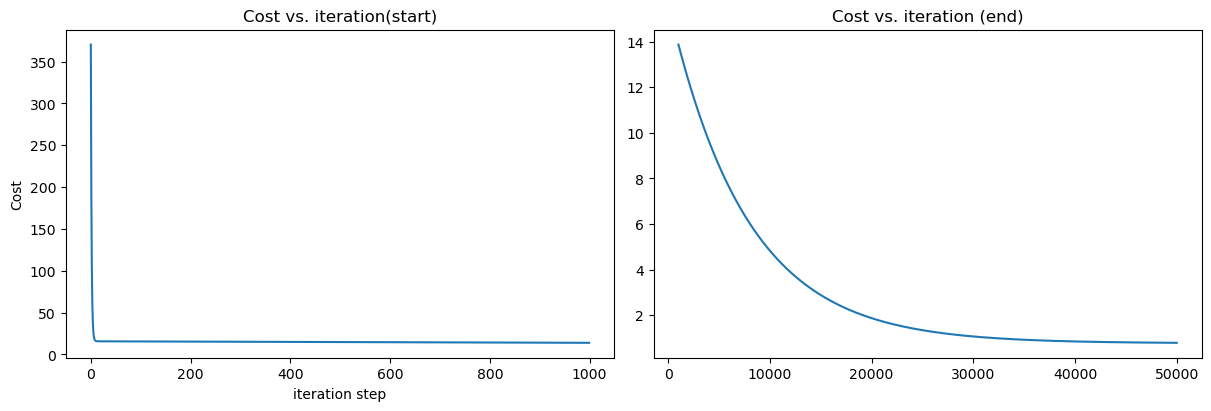

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout = True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel("Cost")
ax1.set_xlabel('iteration step')
plt.show()

# Predictions

Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Futher, the value not in the prediction is in line with the expected value. 

In [14]:
print(f"24 m^2 house prediction {w_final * 24 + b_final: 0.1f} 10M Won")
print(f"40 m^2 house prediction {w_final * 40 + b_final: 0.1f} 10M Won")
print(f"51 m^2 house prediction {w_final * 51 + b_final: 0.1f} 10M Won")

24 m^2 house prediction  12.3 10M Won
40 m^2 house prediction  34.8 10M Won
51 m^2 house prediction  50.2 10M Won


# Plotting
We can show the progress of gradient descent during its execution by plotting the cost over iteractions on a contour plot of the cost(w,b)
fig, ax = plt.subplots(1,1, figsize(12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)


In this lab, we:
- investigated the details of gradient descent for a single variable. 
- developed a routine to compute the gradient
- visualized what the gradient is
- completed a gradient descent routine
- utilized gradient descent to find parameters 
- examined the impact of sizing the learning rate